### PPOL564 | Data Science 1: Foundations | Coding discussion 06
####  Alvaro Altamirano Montoya

#### 1 : Import Libraries, set WD, and load files.

In [1]:
# 1.1 Requirements
# Data Management/Investigation
import os
import pandas as pd
import numpy as np
import missingno as miss
import matplotlib.pyplot as plt
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.linear_model import LassoLars as LS
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.linear_model import HuberRegressor as HU

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
# 1.2 Set paths and read files
path = r'C:\Users\unily\Documents\Georgetown\PPOL 564 - Intro to Data Science\Coding discussions\6'
os.chdir(path) # Set WD
# 1.3 Load training and test data
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")
print('training: '+str(train.shape), '; test: '+str(test.shape))

training: (43590, 39) ; test: (14531, 39)


In [3]:
train.head(4)

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,LN_PRICE
0,78021,4061N 0085,3.0,1.0,1.0,Forced Air,Y,1.0,9.0,4.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,11,2234,2018-07-22T18:01:43.000Z,13.591116
1,28783,1587 0075,2.0,1.0,7.0,Warm Cool,Y,1.0,7.0,3.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,3850,2018-07-22T18:01:43.000Z,12.730801
2,35035,2024 0817,2.0,2.0,13.0,Hot Water Rad,Y,1.0,9.0,4.0,...,11.0,Slate,6.0,Hardwood,1.0,1.0,12,7866,2018-07-22T18:01:43.000Z,13.651814
3,67983,3736 0059,1.0,1.0,7.0,Warm Cool,Y,1.0,6.0,3.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,13,2739,2018-07-22T18:01:43.000Z,12.860999


#### Print number of missing per variable in training data (top 10)

In [4]:
print((train.isnull().sum() * 100 / len(train)).round(4).sort_values(ascending = False)[0:10])

YR_RMDL      42.6313
STORIES       0.0665
ROOMS         0.0252
BEDRM         0.0092
AYB           0.0092
KITCHENS      0.0046
HF_BATHRM     0.0046
CNDTN         0.0023
GRADE_D       0.0023
CNDTN_D       0.0023
dtype: float64


In [5]:
# This table shows distribution statistics for train data. 
#The independent variable (LN_PRICE) seems to be well distributed around a median of $440K per house.
# There is only one variable with a high missing values percentage, remodel year (YR_RMDL).
display(train.describe())

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,43590.000000,43589.000000,43588.000000,43589.000000,43589.000000,43579.000000,43586.000000,43586.000000,25007.000000,43590.000000,...,43589.000000,43589.000000,43589.000000,43589.000000,43589.000000,43588.000000,43589.000000,43590.000000,43590.000000,43590.000000
mean,52159.470452,2.203331,0.649697,6.853954,1.220675,7.424815,3.428073,1931.199422,2004.274683,1969.804313,...,4.297116,3.706348,13.467756,3.960839,6.302049,1.250551,0.639014,13.268640,3175.001078,12.927904
std,31134.869767,1.068895,0.608786,5.151037,0.624555,2.334643,1.163447,86.229606,17.783975,16.926513,...,1.373435,0.746981,4.045380,3.334032,2.098208,0.669050,0.905193,4.170675,3200.666743,0.865822
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,24534.250000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.000000,12.388394
50%,51708.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2008.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2212.000000,12.994530
75%,79542.750000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2013.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107154.000000,24.000000,11.000000,13.000000,6.000000,36.000000,54.000000,2018.000000,2019.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,39.000000,187301.000000,17.038378


#### Initial cleaning/wrangling function

In [6]:
def load_clean(df=None):
    '''
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no LN_Price data
    2. Creates X as all the columns that are not the LN_Price column
    3. Creates y as the LN_Price column
    4. For each numeric variable in X, fill the column with the mean value of the column.
    INPUT
    df - a pandas dataframe 
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing price values
    df = df.dropna(subset=['LN_PRICE'], axis=0)
    df = df.drop('OBJECTID', 1)
    y = df['LN_PRICE']
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True) 
    X = df
    return X, y

#Use the function to create X and y for both train and test
X, y = load_clean(train)
train_X = X
train_y = y
X, y = load_clean(test)
test_X = X
test_y = y

In [7]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)
# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BEDRM','BATHRM','ROOMS','LANDAREA'])])
# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])
# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [

    # Stochastic Gradient Descent
    {'model' : [SGD(max_iter=1000, tol=1e-3)]},
    
    # Lasso-Lars
    {'model' : [LS(alpha=0.1)]},
    
    # HuberRegressor
    {'model' : [HU()]},
    
    # OLS
    {'model' : [LM(normalize=True)]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30, 35, 40, 60]},

    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},

    # The Bagging decision tree model 
    {'model': [Bag()]},

    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3, 4, 5],
     'model__n_estimators':[500,1000,1250, 1500]},
]

# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=8)
# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         ['BEDRM',
      

#### Test models' performance

In [8]:
# Mean out-of-sample (CV) error
search.best_score_

-0.516079061244915

In [9]:
search.best_params_

{'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform'),
 'model__n_neighbors': 60}

In [10]:
# predict on test data
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)
# Mean squared error
m.r2_score(test_y, pred_y)

0.31099562424846483

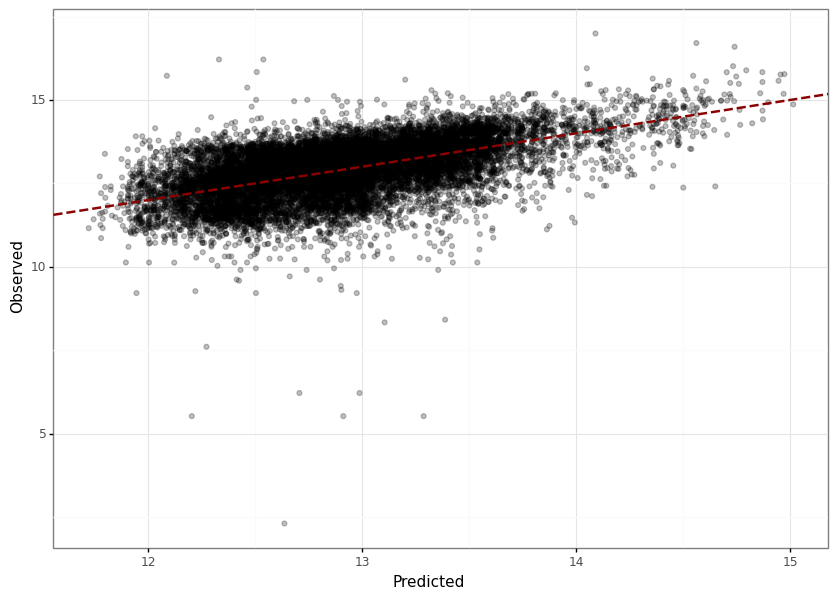

<ggplot: (-9223371907465367152)>

In [20]:
# Plot
# Plot performance 
(
    ggplot(pd.DataFrame(dict(Predicted=pred_y,Observed=test_y)),
          aes(x='Predicted',y="Observed")) +
    geom_point(alpha=.25) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)


#### For this regression task, the model that resulted in the lowest neg_mean_squared_error was a `KN` with 60 `neighbors`, obtaining a neg_mean_squared_error of -0.516 and a R_squared of 0.31. I also included three additional lineal models, a Huber robust regression to control for outliers, a LassoLars regressor, and a Stochastic Gradient Descent regressor.